# **Importing all necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import GenericUnivariateSelect,RFE,RFECV,SequentialFeatureSelector,SelectFromModel
from mlxtend.feature_selection import ColumnSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from itertools import combinations

# **Defining function, which will be used to evaluate performances**

In [ ]:
def estimate(X,y,model=RandomForestClassifier(max_depth=3)):
    scores=cross_val_score(model,X,y,scoring='f1',cv=5)
    return scores.mean(),scores.std()

# **First dataset**

In [ ]:
methods=[]
f1s=np.zeros(shape=11)
stds=np.zeros(shape=11)

## **Analyzing dataset**

In [ ]:
df=pd.read_csv('/kaggle/input/winequality/winequality-red.csv',delimiter=';')
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
y=df.quality.values
X=df.drop(['quality'],axis=1)
print(y)
display(X)

[5 5 5 ... 6 5 6]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
qualities=np.unique(y)
print(qualities)

[3 4 5 6 7 8]


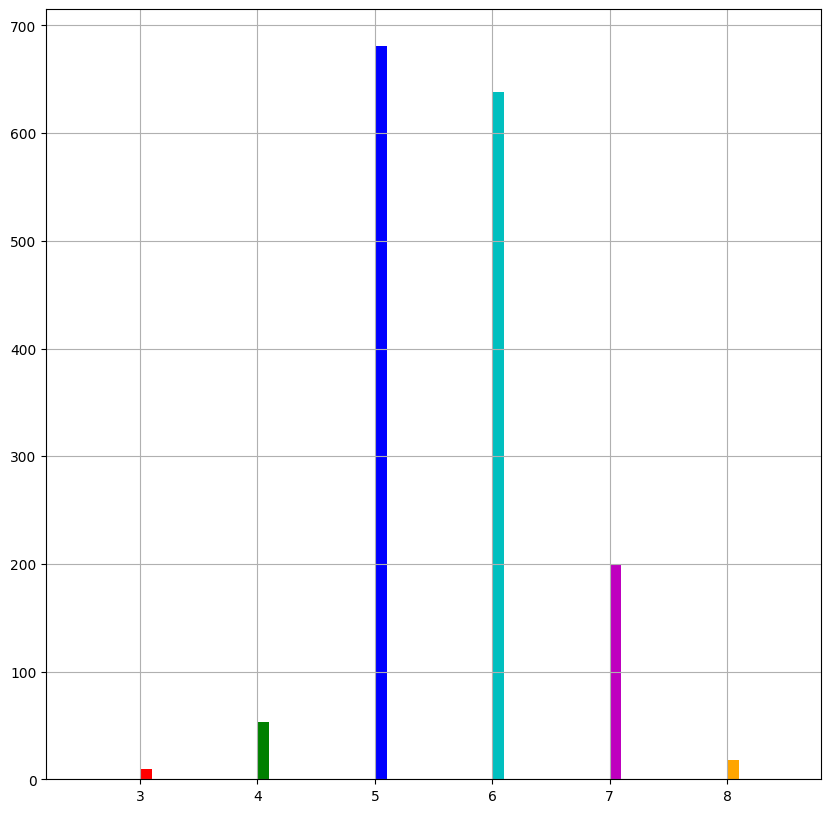

In [ ]:
colors=['r','g','b','c','m','orange','yellow']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
ax.grid()
for i in range(len(qualities)):
    ax.hist(y[y==qualities[i]],color=colors[i])
plt.xticks(qualities)
plt.show()

In [ ]:
y[y<=5]=0
y[y>=6]=1
print(y)

[0 0 0 ... 1 0 1]


In [ ]:
feature_names=X.columns.values
print(feature_names)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']


## **Preprocessing of the dataset, using StandardScaler**

In [ ]:
for col in X.columns:
    ss=StandardScaler()
    X[col]=ss.fit_transform(X[col].values.reshape(-1,1)).reshape(-1,1)
X.describe()
X=X.values
print(X)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


In [ ]:
f1s[0],stds[0]=estimate(X,y)
methods.append('Original Dataset')
print(f1s[0],stds[0])

0.7498039392219116 0.05504509865907445


## **Univariate feature selection**

In [ ]:
n_features=4
us=GenericUnivariateSelect(mode='k_best')
us.fit(X,y)
print(us.n_features_in_)
print(us.scores_)
ind=np.argsort(np.array(us.scores_))
mask=(ind>len(ind)-n_features-1)
print(feature_names[mask])

11
[1.45730876e+01 1.84022796e+02 4.14901228e+01 7.45410259e-03
 1.93786591e+01 6.11410958e+00 9.08160161e+01 4.14797235e+01
 1.70139626e-02 7.97376798e+01 3.72194765e+02]
['volatile acidity' 'free sulfur dioxide' 'density' 'alcohol']


In [ ]:
f1s[1],stds[1]=estimate(X[:,mask],y)
methods.append('UnivariateFeatureSelector')
print(f1s[1],stds[1])

0.7317455093382683 0.07049997950763667


## **Recurcive feature elemination**

In [ ]:
n_features=4
rfe=RFE(estimator=RandomForestClassifier(max_depth=3),n_features_to_select=n_features).fit(X,y)
print(rfe.n_features_in_)
print(rfe.n_features_)
print(rfe.ranking_)
print(rfe.estimator_.feature_importances_)
mask=[True if x==1 else False for x in rfe.ranking_ ]
print(feature_names[mask])

11
4
[4 1 3 8 5 7 1 2 6 1 1]
[0.18313971 0.09452059 0.22199372 0.50034599]
['volatile acidity' 'total sulfur dioxide' 'sulphates' 'alcohol']


In [ ]:
f1s[2],stds[2]=estimate(X[:,mask],y)
methods.append('RFE')
print(f1s[2],stds[2])

0.7544122782452793 0.04029885017379579


## **Recurcive feature elimination with cross-validation**

In [ ]:
rfecv=RFECV(RandomForestClassifier(max_depth=3),scoring='f1').fit(X,y)
print(rfecv.n_features_in_)
print(rfecv.n_features_)
print(rfecv.ranking_)
print(rfecv.estimator_.feature_importances_)
mask=[True if x==1 else False for x in rfecv.ranking_ ]
print(feature_names[mask])

11
3
[6 1 4 9 5 8 2 3 7 1 1]
[0.24633909 0.32837391 0.425287  ]
['volatile acidity' 'sulphates' 'alcohol']


In [ ]:
f1s[3],stds[3]=estimate(X[:,mask],y)
methods.append('RFECV')
print(f1s[3],stds[3])

0.7471023612696669 0.037595670499357


## **Sequential feature selection**

### **Forward**

In [ ]:
sf=SequentialFeatureSelector(RandomForestClassifier(max_depth=3),n_features_to_select='auto',direction='forward').fit(X,y)
print(sf.n_features_in_)
print(sf.n_features_to_select_)
print(feature_names[sf.support_])

11
5
['volatile acidity' 'chlorides' 'total sulfur dioxide' 'sulphates'
 'alcohol']


In [ ]:
f1s[4],stds[4]=estimate(X[:,sf.support_],y)
methods.append('SFS(sklearn)')
print(f1s[4],stds[4])

0.7533715461571876 0.040659445515688404


### **Backward**

In [ ]:
sb=SequentialFeatureSelector(RandomForestClassifier(max_depth=3),n_features_to_select='auto',direction='backward').fit(X,y)
print(sb.n_features_in_)
print(sb.n_features_to_select_)
print(feature_names[sb.support_])

11
6
['volatile acidity' 'residual sugar' 'total sulfur dioxide' 'density'
 'sulphates' 'alcohol']


In [ ]:
f1s[5],stds[5]=estimate(X[:,sb.support_],y)
methods.append('SBS(sklearn)')
print(f1s[5],stds[5])

0.7531007825470439 0.04589324133211703


## **Selection from model**

### **Logistic Regression**

In [ ]:
sfm_lr=SelectFromModel(LogisticRegression(penalty='l1',solver='liblinear',C=0.01)).fit(X,y)
print(sfm_lr.estimator_.coef_)
print(sfm_lr.threshold_)
print(feature_names[sfm_lr.get_support()])

[[ 0.         -0.2852757   0.          0.          0.          0.
  -0.08909564  0.          0.          0.0754699   0.60946331]]
1e-05
['volatile acidity' 'total sulfur dioxide' 'sulphates' 'alcohol']


In [ ]:
f1s[6],stds[6]=estimate(X[:,sfm_lr.get_support()],y)
methods.append('SelectFromModel+LogisticRegression')
print(f1s[6],stds[6])

0.7535998426712945 0.042764397789511424


### **Random Forest**

In [ ]:
sfm_rf=SelectFromModel(RandomForestClassifier(max_depth=3)).fit(X,y)
print(sfm_rf.estimator_.feature_importances_)
print(sfm_rf.threshold_)
print(feature_names[sfm_rf.get_support()])

[0.02109225 0.13392236 0.03487201 0.00647087 0.02957494 0.01210286
 0.10707778 0.04567988 0.01306503 0.1780282  0.4181138 ]
0.09090909090909091
['volatile acidity' 'total sulfur dioxide' 'sulphates' 'alcohol']


In [ ]:
f1s[7],stds[7]=estimate(X[:,sfm_rf.get_support()],y)
methods.append('SelectFromModel+RandomForestClassifier')
print(f1s[7],stds[7])

0.7514244036799668 0.041256508989224075


## **ColumnSelector**

In [ ]:
n_features=4
all_comb=list(combinations(range(len(feature_names)),r=n_features))
print(all_comb)
print(len(all_comb))

[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7), (0, 1, 2, 8), (0, 1, 2, 9), (0, 1, 2, 10), (0, 1, 3, 4), (0, 1, 3, 5), (0, 1, 3, 6), (0, 1, 3, 7), (0, 1, 3, 8), (0, 1, 3, 9), (0, 1, 3, 10), (0, 1, 4, 5), (0, 1, 4, 6), (0, 1, 4, 7), (0, 1, 4, 8), (0, 1, 4, 9), (0, 1, 4, 10), (0, 1, 5, 6), (0, 1, 5, 7), (0, 1, 5, 8), (0, 1, 5, 9), (0, 1, 5, 10), (0, 1, 6, 7), (0, 1, 6, 8), (0, 1, 6, 9), (0, 1, 6, 10), (0, 1, 7, 8), (0, 1, 7, 9), (0, 1, 7, 10), (0, 1, 8, 9), (0, 1, 8, 10), (0, 1, 9, 10), (0, 2, 3, 4), (0, 2, 3, 5), (0, 2, 3, 6), (0, 2, 3, 7), (0, 2, 3, 8), (0, 2, 3, 9), (0, 2, 3, 10), (0, 2, 4, 5), (0, 2, 4, 6), (0, 2, 4, 7), (0, 2, 4, 8), (0, 2, 4, 9), (0, 2, 4, 10), (0, 2, 5, 6), (0, 2, 5, 7), (0, 2, 5, 8), (0, 2, 5, 9), (0, 2, 5, 10), (0, 2, 6, 7), (0, 2, 6, 8), (0, 2, 6, 9), (0, 2, 6, 10), (0, 2, 7, 8), (0, 2, 7, 9), (0, 2, 7, 10), (0, 2, 8, 9), (0, 2, 8, 10), (0, 2, 9, 10), (0, 3, 4, 5), (0, 3, 4, 6), (0, 3, 4, 7), (0, 3, 4, 8), (0, 3, 4, 9), (0, 3, 4, 10), (0,

In [ ]:
pipeline=make_pipeline(ColumnSelector(),RandomForestClassifier(max_depth=3))
param_grid={'columnselector__cols':all_comb}
grid=GridSearchCV(pipeline,param_grid,cv=5,scoring='f1')
grid.fit(X,y)
print('Best parameters:',grid.best_params_)
print('Best performance:',grid.best_score_)
print(feature_names[list(grid.best_params_['columnselector__cols'])])

Best parameters: {'columnselector__cols': (1, 6, 9, 10)}
Best performance: 0.7531753693240977
['volatile acidity' 'total sulfur dioxide' 'sulphates' 'alcohol']


In [ ]:
f1s[8],stds[8]=estimate(X[:,list(grid.best_params_['columnselector__cols'])],y)
methods.append('ColumnSelector+GridSearchCV')
print(f1s[8],stds[8])

0.7503532184566438 0.04023447781597983


## **Sequential feature selection (mlxtend)**

### **Forward**

In [ ]:
sf_=SFS(RandomForestClassifier(max_depth=3),k_features='best',forward=True,scoring='f1')
sf_=sf_.fit(X, y)
print(sf_.k_feature_idx_)
print(feature_names[list(sf_.k_feature_idx_)])
print(sf_.k_score_)

(0, 1, 5, 6, 8, 9, 10)
['fixed acidity' 'volatile acidity' 'free sulfur dioxide'
 'total sulfur dioxide' 'pH' 'sulphates' 'alcohol']
0.7609028497409815


In [ ]:
f1s[9],stds[9]=estimate(X[:,list(sf_.k_feature_idx_)],y)
methods.append('SFS(mlxtend)')
print(f1s[9],stds[9])

0.7572568177958268 0.029822117964857203


### **Backward**

In [ ]:
sb_=SFS(RandomForestClassifier(max_depth=3),k_features='best',forward=False,scoring='f1')
sb_=sb_.fit(X, y)
print(sb_.k_feature_idx_)
print(feature_names[list(sb_.k_feature_idx_)])
print(sb_.k_score_)

(1, 3, 5, 6, 7, 9, 10)
['volatile acidity' 'residual sugar' 'free sulfur dioxide'
 'total sulfur dioxide' 'density' 'sulphates' 'alcohol']
0.7610954015395658


In [ ]:
f1s[10],stds[10]=estimate(X[:,list(sb_.k_feature_idx_)],y)
methods.append('SBS(mlxtend)')
print(f1s[10],stds[10])

0.7511189216842598 0.04954336786142185


## **Visualizing overall perfomance across methods**

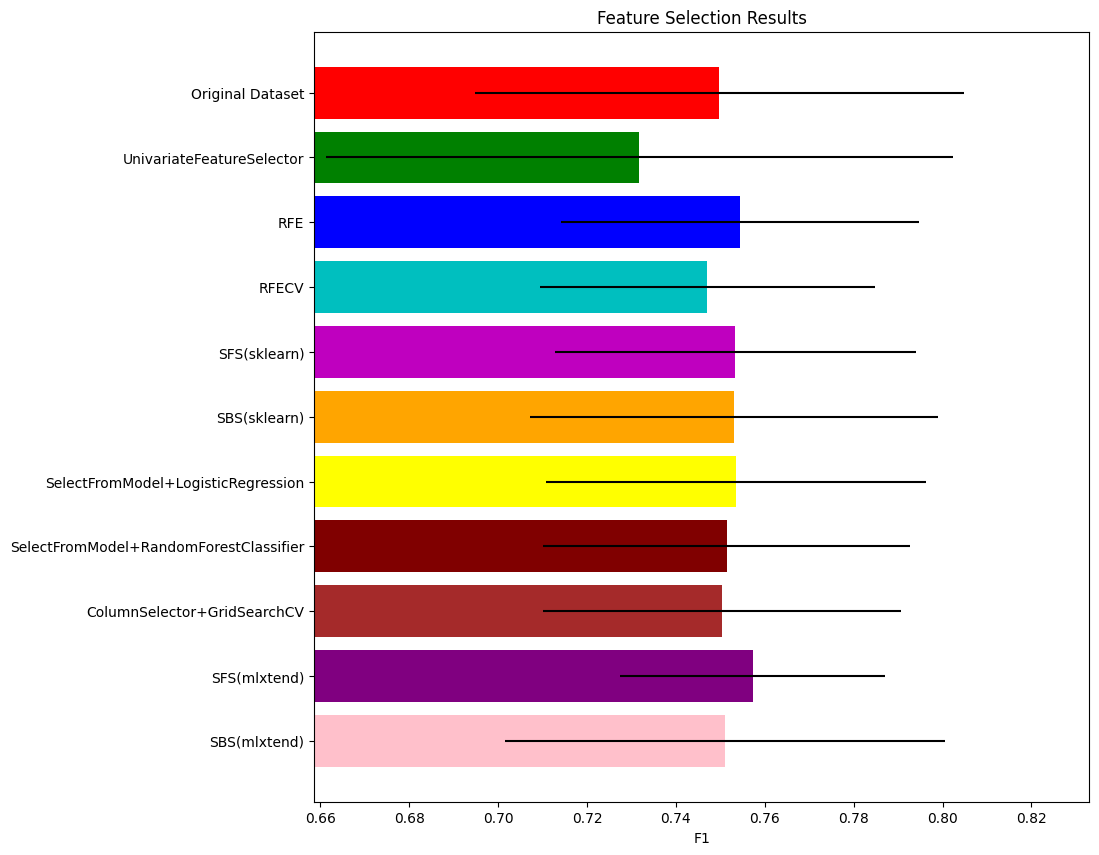

In [ ]:
n_bars=len(f1s)
colors=["r", "g", "b", "c", "m",'orange','yellow','maroon','brown','purple','pink']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
for j in range(n_bars):
    ax.barh(j,f1s[j],xerr=stds[j],color=colors[j],align="center")
ax.set_title("Feature Selection Results")
ax.set_xlim(left=np.min(f1s)* 0.9,right=np.max(f1s)*1.1)
ax.set_yticks(range(n_bars))
ax.set_xlabel("F1")
ax.invert_yaxis()
x_labels=methods
ax.set_yticklabels(x_labels)
plt.show()

# **Second dataset**

In [ ]:
methods=[]
f1s=np.zeros(shape=11)
stds=np.zeros(shape=11)

In [ ]:
X,y=make_classification(n_samples=101,n_features=16,n_informative=3,n_redundant=3)
print(X)
print(y)

[[ 0.29576258  0.50042079 -0.9545061  ... -1.85736148  1.05474243
  -1.13829876]
 [ 0.48611096  1.87908751  0.15246918 ...  1.11539959 -0.29348347
   0.52351268]
 [ 0.18975343  0.57077833  1.56981484 ... -0.06541698 -0.31358219
  -0.30707485]
 ...
 [-1.65286611  0.20355375  0.32963317 ... -1.01341179  0.0340746
  -2.05322771]
 [-0.91452886 -2.2757841   1.77665465 ... -0.32852352  0.97191897
   0.02906787]
 [ 0.59935633  0.35429941  0.0605154  ...  0.30135352 -0.42061113
  -1.66369153]]
[1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1]


In [ ]:
f1s[0],stds[0]=estimate(X,y)
methods.append('Original Dataset')
print(estimate(X,y))

(0.8488995215311004, 0.07190825663201028)


## **Univariate feature selection**

In [ ]:
n_features=3
us=GenericUnivariateSelect(mode='k_best')
us.fit(X,y)
print(us.n_features_in_)
print(us.scores_)
ind=np.argsort(np.array(us.scores_))
mask=(ind>len(ind)-n_features-1)

16
[1.01544749e-02 2.15810415e+01 1.69243145e+00 1.42589824e+01
 8.06104296e+01 1.16024950e+00 7.11811186e-03 4.95024859e-01
 1.58368474e-02 6.01179142e-01 1.28365503e+01 1.60485465e+00
 5.10148004e-01 2.56999470e-01 1.73015490e+00 4.42548075e+00]


In [ ]:
f1s[1],stds[1]=estimate(X[:,mask],y)
methods.append('UnivariateFeatureSelector')
print(f1s[1],stds[1])

0.8257319770013268 0.06502192062980432


## **Recurcive feature elimination**

In [ ]:
n_features=3
rfe=RFE(estimator=RandomForestClassifier(max_depth=3),n_features_to_select=n_features).fit(X,y)
print(rfe.n_features_in_)
print(rfe.n_features_)
print(rfe.ranking_)
print(rfe.estimator_.feature_importances_)
mask=[True if x==1 else False for x in rfe.ranking_ ]

16
3
[ 6  2 11  1  1 10  8  3  4 13  1 12  9  7 14  5]
[0.30630102 0.45247631 0.24122267]


In [ ]:
f1s[2],stds[2]=estimate(X[:,mask],y)
methods.append('RFE')
print(f1s[2],stds[2])

0.8446198830409356 0.085032859467506


## **Recurcive feature elimination with cross-validation**

In [ ]:
rfecv=RFECV(RandomForestClassifier(max_depth=3),scoring='f1').fit(X,y)
print(rfecv.n_features_in_)
print(rfecv.n_features_)
print(rfecv.ranking_)
print(rfecv.estimator_.feature_importances_)
mask=[True if x==1 else False for x in rfecv.ranking_ ]

16
6
[10  1  7  1  1  6  9  1  1 11  1  5  4  3  8  2]
[0.15445606 0.17181309 0.36372753 0.06169775 0.06720253 0.18110305]


In [ ]:
f1s[3],stds[3]=estimate(X[:,mask],y)
methods.append('RFECV')
print(f1s[3],stds[3])

0.8664433811802233 0.060612667407127424


## **Sequential feature selection**

### **Forward**

In [ ]:
sf=SequentialFeatureSelector(RandomForestClassifier(max_depth=3),n_features_to_select=3,direction='forward').fit(X,y)
print(sf.n_features_in_)
print(sf.n_features_to_select_)
print(sf.support_)

16
3
[False  True False  True  True False False False False False False False
 False False False False]


In [ ]:
f1s[4],stds[4]=estimate(X[:,sf.support_],y)
methods.append('SFS(sklearn)')
print(f1s[4],stds[4])

0.8564017887856897 0.05995033631601408


### **Backward**

In [ ]:
sb=SequentialFeatureSelector(RandomForestClassifier(max_depth=3),n_features_to_select=3,direction='backward').fit(X,y)
print(sb.n_features_in_)
print(sb.n_features_to_select_)
print(sb.support_)

16
3
[False False False  True  True False False False False False False False
 False False False  True]


In [ ]:
f1s[5],stds[5]=estimate(X[:,sb.support_],y)
methods.append('SBS(sklearn)')
print(f1s[5],stds[5])

0.850125313283208 0.08896925406449645


## **Select from model**

### **Logistic Regression**

In [ ]:
sfm_lr=SelectFromModel(LogisticRegression(penalty='l1',solver='liblinear',C=0.1)).fit(X,y)
print(sfm_lr.estimator_.coef_)
print(sfm_lr.threshold_)
print(sfm_lr.get_support())

[[ 0.          0.          0.          0.         -1.08287038  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
1e-05
[False False False False  True False False False False False False False
 False False False False]


In [ ]:
f1s[6],stds[6]=estimate(X[:,sfm_lr.get_support()],y)
methods.append('SelectFromModel+LogisticRegression')
print(f1s[6],stds[6])

0.8091267811472415 0.06634667196884675


### **Random Forest**

In [ ]:
sfm_rf=SelectFromModel(RandomForestClassifier(max_depth=3)).fit(X,y)
print(sfm_rf.estimator_.feature_importances_)
print(sfm_rf.threshold_)
print(sfm_rf.get_support())

[0.03717633 0.10541847 0.01910554 0.13138898 0.29510062 0.02434194
 0.02089363 0.03663494 0.03786499 0.01476782 0.14727366 0.02547095
 0.02304512 0.02719647 0.01994039 0.03438016]
0.06250000000000001
[False  True False  True  True False False False False False  True False
 False False False False]


In [ ]:
f1s[7],stds[7]=estimate(X[:,sfm_rf.get_support()],y)
methods.append('SelectFromModel+RandomForestClassifier')
print(f1s[7],stds[7])

0.8533714857553866 0.0614050697511893


## **ColumnSelector**

In [ ]:
n_features=3
all_comb=list(combinations(range(X.shape[1]),r=n_features))
print(all_comb)
print(len(all_comb))

[(0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 1, 8), (0, 1, 9), (0, 1, 10), (0, 1, 11), (0, 1, 12), (0, 1, 13), (0, 1, 14), (0, 1, 15), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 2, 6), (0, 2, 7), (0, 2, 8), (0, 2, 9), (0, 2, 10), (0, 2, 11), (0, 2, 12), (0, 2, 13), (0, 2, 14), (0, 2, 15), (0, 3, 4), (0, 3, 5), (0, 3, 6), (0, 3, 7), (0, 3, 8), (0, 3, 9), (0, 3, 10), (0, 3, 11), (0, 3, 12), (0, 3, 13), (0, 3, 14), (0, 3, 15), (0, 4, 5), (0, 4, 6), (0, 4, 7), (0, 4, 8), (0, 4, 9), (0, 4, 10), (0, 4, 11), (0, 4, 12), (0, 4, 13), (0, 4, 14), (0, 4, 15), (0, 5, 6), (0, 5, 7), (0, 5, 8), (0, 5, 9), (0, 5, 10), (0, 5, 11), (0, 5, 12), (0, 5, 13), (0, 5, 14), (0, 5, 15), (0, 6, 7), (0, 6, 8), (0, 6, 9), (0, 6, 10), (0, 6, 11), (0, 6, 12), (0, 6, 13), (0, 6, 14), (0, 6, 15), (0, 7, 8), (0, 7, 9), (0, 7, 10), (0, 7, 11), (0, 7, 12), (0, 7, 13), (0, 7, 14), (0, 7, 15), (0, 8, 9), (0, 8, 10), (0, 8, 11), (0, 8, 12), (0, 8, 13), (0, 8, 14), (0, 8, 15), (0, 9, 10), (0, 9, 11), (0,

In [ ]:
pipeline=make_pipeline(ColumnSelector(),RandomForestClassifier(max_depth=3))
param_grid={'columnselector__cols':all_comb}
grid=GridSearchCV(pipeline,param_grid,cv=5,scoring='f1')
grid.fit(X,y)
print('Best parameters:',grid.best_params_)
print('Best performance:',grid.best_score_)

Best parameters: {'columnselector__cols': (1, 4, 12)}
Best performance: 0.8919573443412453


In [ ]:
f1s[8],stds[8]=estimate(X[:,list(grid.best_params_['columnselector__cols'])],y)
methods.append('ColumnSelector+GridSearchCV')
print(f1s[8],stds[8])

0.8482775566366897 0.07982651754064793


## **Sequential feature selection(mlxtend)**

### **Forward**

In [ ]:
sf_=SFS(RandomForestClassifier(max_depth=3),k_features=3,forward=True,scoring='f1')
sf_=sf_.fit(X, y)
print(sf_.k_feature_idx_)
print(sf_.k_score_)

(3, 4, 12)
0.8945029239766082


In [ ]:
f1s[9],stds[9]=estimate(X[:,list(sf_.k_feature_idx_)],y)
methods.append('SFS(mlxtend)')
print(f1s[9],stds[9])

0.8678863826232247 0.05603407213580532


### **Backward**

In [ ]:
sb_=SFS(RandomForestClassifier(max_depth=3),k_features=3,forward=False,scoring='f1')
sb_=sb_.fit(X, y)
print(sb_.k_feature_idx_)
print(sb_.k_score_)

(3, 4, 12)
0.8742355889724311


In [ ]:
f1s[10],stds[10]=estimate(X[:,list(sb_.k_feature_idx_)],y)
methods.append('SBS(mlxtend)')
print(f1s[10],stds[10])

0.8611636935475945 0.05886464300845011


## **Visualizing overall perfomance across methods**

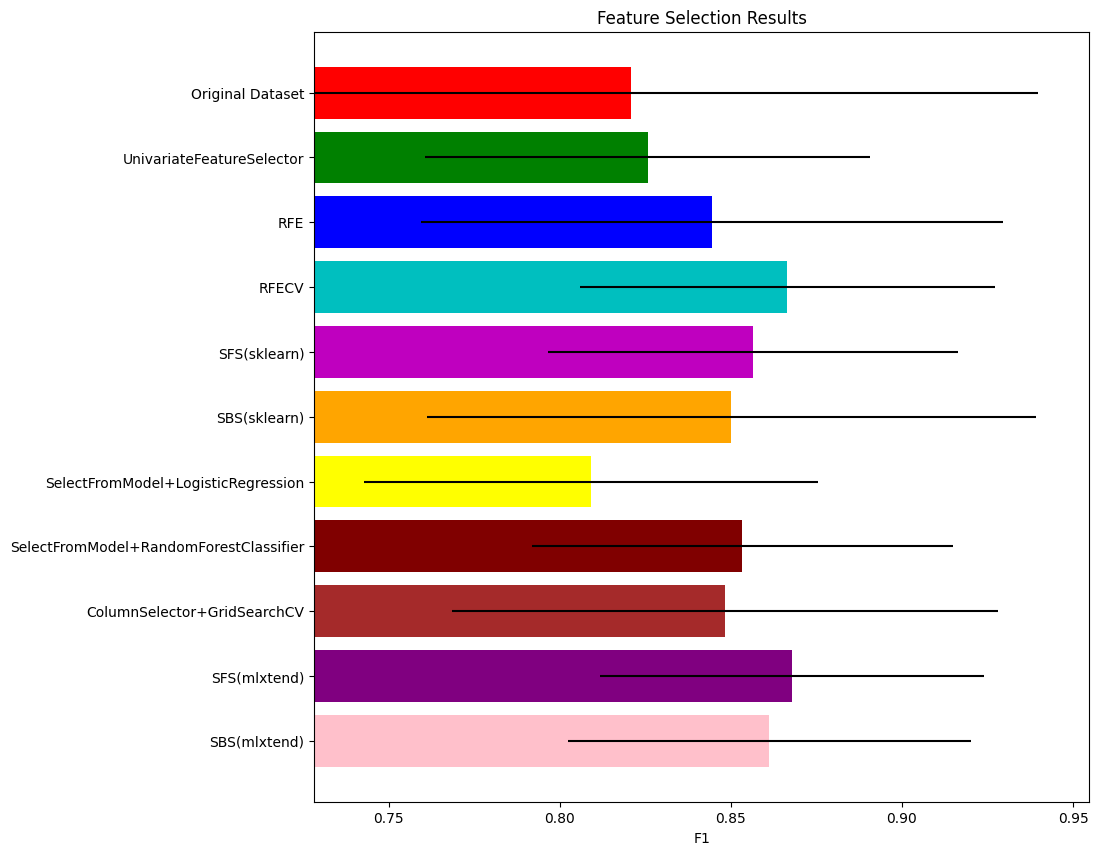

In [ ]:
n_bars=len(f1s)
colors=["r", "g", "b", "c", "m",'orange','yellow','maroon','brown','purple','pink']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
for j in range(n_bars):
    ax.barh(j,f1s[j],xerr=stds[j],color=colors[j],align="center")
ax.set_title("Feature Selection Results")
ax.set_xlim(left=np.min(f1s)* 0.9,right=np.max(f1s)*1.1)
ax.set_yticks(range(n_bars))
ax.set_xlabel("F1")
ax.invert_yaxis()
x_labels=methods
ax.set_yticklabels(x_labels)
plt.show()

# **Third dataset(number of features is bigger, than number of samples in dataset)**

In [ ]:
methods=[]
f1s=np.zeros(shape=8)
stds=np.zeros(shape=8)

In [ ]:
X,y=make_classification(n_samples=101,n_features=102,n_informative=3,n_redundant=3)
print(X)
print(y)

[[ 0.97556828  0.71868411  0.13320874 ...  0.5990828  -0.50861244
  -0.88374634]
 [-1.23988811 -0.14365425 -1.57164507 ...  0.98757052  1.11248672
   1.00380561]
 [ 1.48931663 -0.50484081  1.63930503 ...  0.61603711  0.52809403
  -1.63550019]
 ...
 [-1.5548892  -0.455391   -1.96779526 ...  1.31523254 -1.76948112
   2.30475009]
 [ 0.05777842 -0.90098875 -1.14898886 ... -0.13746307  1.52356788
   2.07458944]
 [-0.95586718 -0.85295478 -0.41826146 ...  0.63062636  1.00262248
   0.55336319]]
[0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1]


In [ ]:
f1s[0],stds[0]=estimate(X,y)
methods.append('Original Dataset')
print(estimate(X,y))

(0.8345098039215687, 0.07294820403281695)


## **Univariate feature selection**

In [ ]:
n_features=3
us=GenericUnivariateSelect(mode='k_best')
us.fit(X,y)
print(us.n_features_in_)
print(us.scores_)
ind=np.argsort(np.array(us.scores_))
mask=(ind>len(ind)-n_features-1)

102
[7.22682783e-02 1.27896972e-04 1.16894588e+02 3.01991477e-01
 1.63711247e+00 5.55927714e-02 3.83635735e-01 1.57597547e+00
 4.88515504e-01 9.67303026e-01 1.25674825e+00 7.17814777e-02
 7.72351526e-01 3.89776789e-02 8.28429763e-02 1.16851993e-04
 2.90749145e+00 1.74453912e+00 3.15353875e-02 1.82360689e-03
 7.17643006e+00 3.00055487e+00 9.30464220e-01 2.22597696e+00
 7.20715737e-02 9.57622329e-01 4.40526356e-01 9.67201347e+00
 1.59462169e-01 6.96712095e-01 2.88406160e+00 2.53057837e+00
 8.07238768e-01 1.54724828e+00 8.90943452e+00 3.90738185e-01
 1.10688255e-01 2.76539375e-01 1.57613822e-01 2.02710807e+00
 6.16752058e-01 1.34451390e+00 6.22251178e-02 5.01165342e+00
 2.72241759e+00 2.63856167e-01 2.06101516e+00 5.37793964e-04
 1.54400412e+00 1.50305179e-01 1.03675024e-01 1.73389558e-01
 2.45528524e-01 3.19244546e-01 7.97105013e-02 1.67260743e-01
 1.54445585e+00 2.69460853e-01 3.42185585e-02 6.56435468e-01
 5.19169023e-01 1.26116126e+00 8.76992891e-01 5.79241717e-01
 3.05290260e-01 3.82

In [ ]:
f1s[1],stds[1]=estimate(X[:,mask],y)
methods.append('UnivariateFeatureSelector')
print(f1s[1],stds[1])

0.6807017543859647 0.05131645748812477


## **Recurcive feature elimination**

In [ ]:
n_features=3
rfe=RFE(estimator=RandomForestClassifier(max_depth=3),n_features_to_select=n_features).fit(X,y)
print(rfe.n_features_in_)
print(rfe.n_features_)
print(rfe.ranking_)
print(rfe.estimator_.feature_importances_)
mask=[True if x==1 else False for x in rfe.ranking_ ]

102
3
[ 75  77   1  55  24  72  64  20  36  82  23  99  15 100  92  70  32  81
  97  67   1  96  98  51  50  45  84   4  39  57  68  12  33  41   7  49
  27  86  18   5  73  35  69   8  34  87  37  71  53  76  56  29  44  48
  60  66  79  40  80  17  16  25  59  62  54  46   1  30  21   3  28  42
  83  93  13  14  91  85   2  43  63  38  78   6  94  10  47  89  58  88
  90  31  19  11  61  52  74  22   9  65  26  95]
[0.47677089 0.27636639 0.24686272]


In [ ]:
f1s[2],stds[2]=estimate(X[:,mask],y)
methods.append('RFE')
print(f1s[2],stds[2])

0.9294736842105265 0.0397499107126299


## **Recurcive feature elimination with cross-validation**

In [ ]:
rfecv=RFECV(RandomForestClassifier(max_depth=3),scoring='f1').fit(X,y)
print(rfecv.n_features_in_)
print(rfecv.n_features_)
print(rfecv.ranking_)
print(rfecv.estimator_.feature_importances_)
mask=[True if x==1 else False for x in rfecv.ranking_ ]

102
12
[90 52  1 73 28 60 71 24 30 37 25 77 16 48 59 23 89 49 88 47  1 26  7 44
 85 55 63  1 10 61 72 12 50 67  1 46 39 58 13  1 45 20 40  1  2 86 19 54
 70 81 79  3 15 68 82 78 27 76 53 18  6 42 74 80 29 87  1 21 14  1 32 36
 56 57 69  4 51 64  1 11 83 41 66  5  9 35  8 43 17 65 91 22 31  1 34 62
  1 75  1 33 84 38]
[0.29261023 0.10953873 0.10158977 0.02212603 0.02152629 0.02645901
 0.1688479  0.09117653 0.10066328 0.01333622 0.02293839 0.02918763]


In [ ]:
f1s[3],stds[3]=estimate(X[:,mask],y)
methods.append('RFECV')
print(f1s[3],stds[3])

0.9294736842105265 0.0397499107126299


## **Sequential feature selection**

### **Forward**

In [ ]:
sf=SequentialFeatureSelector(RandomForestClassifier(max_depth=3),n_features_to_select=3,direction='forward').fit(X,y)
print(sf.n_features_in_)
print(sf.n_features_to_select_)
print(sf.support_)

102
3
[False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


In [ ]:
f1s[4],stds[4]=estimate(X[:,sf.support_],y)
methods.append('SFS(sklearn)')
print(f1s[4],stds[4])

0.9209022556390977 0.04877700391144577


## **Select from model**

### **Logistic Regression**

In [ ]:
sfm_lr=SelectFromModel(LogisticRegression(penalty='l1',solver='liblinear',C=0.1)).fit(X,y)
print(sfm_lr.estimator_.coef_)
print(sfm_lr.threshold_)
print(sfm_lr.get_support())

[[ 0.          0.         -1.33615014  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  -0.13373185  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.     

In [ ]:
f1s[5],stds[5]=estimate(X[:,sfm_lr.get_support()],y)
methods.append('SelectFromModel+LogisticRegression')
print(f1s[5],stds[5])

0.8912781954887219 0.05769734928418627


### **Random Forest**

In [ ]:
sfm_rf=SelectFromModel(RandomForestClassifier(max_depth=3)).fit(X,y)
print(sfm_rf.estimator_.feature_importances_)
print(sfm_rf.threshold_)
print(sfm_rf.get_support())

[0.0026958  0.00228535 0.19696475 0.00605441 0.00506194 0.00955131
 0.00146036 0.00565062 0.00492848 0.00370517 0.00583601 0.00647462
 0.01014163 0.00546049 0.00185859 0.01351857 0.0080337  0.00253578
 0.         0.00275732 0.04073163 0.00495319 0.00784091 0.00898494
 0.00304351 0.00732657 0.00222642 0.0473912  0.00277872 0.00642925
 0.00596963 0.00540844 0.00202641 0.00193743 0.02500952 0.00415215
 0.00083939 0.00398656 0.00338863 0.00978313 0.00634263 0.00441596
 0.00595877 0.01723858 0.00856689 0.00063232 0.00748245 0.01096137
 0.00177018 0.00122898 0.0017835  0.00979969 0.00183218 0.00562392
 0.00369873 0.00194665 0.00152838 0.00395585 0.00110121 0.00097639
 0.00347079 0.00859846 0.00283059 0.00400741 0.00403111 0.
 0.08496264 0.00855666 0.00727408 0.02805717 0.01050206 0.00546914
 0.00255986 0.00361493 0.00833597 0.01031117 0.00349781 0.00102028
 0.06940111 0.01181399 0.00292464 0.00300268 0.00160511 0.01051867
 0.00638909 0.01170322 0.00404434 0.00772619 0.00255239 0.00142837
 0.

In [ ]:
f1s[6],stds[6]=estimate(X[:,sfm_rf.get_support()],y)
methods.append('SelectFromModel+RandomForest')
print(f1s[6],stds[6])

0.9209022556390977 0.04877700391144577


## **Sequential feature selection(mlxtend)**

### **Forward**

In [ ]:
sf_=SFS(RandomForestClassifier(max_depth=3),k_features=3,forward=True,floating=False,scoring='f1')
sf_=sf_.fit(X, y)
print(sf_.k_feature_idx_)
print(sf_.k_score_)

(2, 20, 28)
0.9399498746867169


In [ ]:
f1s[7],stds[7]=estimate(X[:,list(sf_.k_feature_idx_)],y)
methods.append('SFS(mlxtend)')
print(f1s[7],stds[7])

0.9294736842105265 0.0397499107126299


## **Visualizing overall perfomance across methods**

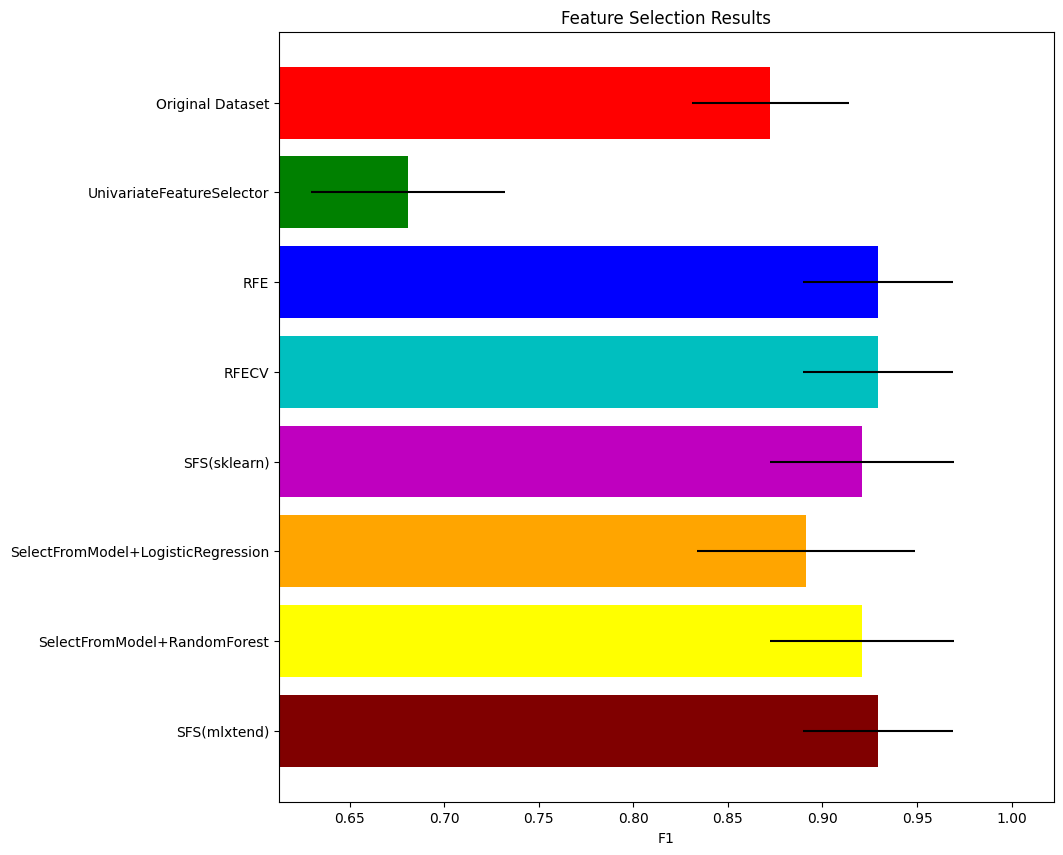

In [ ]:
n_bars=len(f1s)
colors=["r", "g", "b", "c", "m",'orange','yellow','maroon']
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
for j in range(n_bars):
    ax.barh(j,f1s[j],xerr=stds[j],color=colors[j],align="center")
ax.set_title("Feature Selection Results")
ax.set_xlim(left=np.min(f1s)* 0.9,right=np.max(f1s)*1.1)
ax.set_yticks(range(n_bars))
ax.set_xlabel("F1")
ax.invert_yaxis()
x_labels=methods
ax.set_yticklabels(x_labels)
plt.show()